<div style="text-align: center;">
    <h1 style="font-size: 48px;">Loan Approval Classification</h1>
</div>

![Project 8 - Loan Approval Classification](Loan.jpg)

## Load information

In [1]:
import pandas as pd
import numpy as np
import math as mth
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mno
%matplotlib inline
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 2000)

In [2]:
loan = pd.read_csv("C:/Users/Usuario/Desktop/Machine Learning with Python/Repositorio de Projectos/Project 8 - Loan Approval Classification/loan_approval_dataset.csv")
loan.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [3]:
loan.shape

(4269, 13)

In [4]:
loan.duplicated().sum()

0

In [5]:
loan.dtypes

loan_id                       int64
 no_of_dependents             int64
 education                   object
 self_employed               object
 income_annum                 int64
 loan_amount                  int64
 loan_term                    int64
 cibil_score                  int64
 residential_assets_value     int64
 commercial_assets_value      int64
 luxury_assets_value          int64
 bank_asset_value             int64
 loan_status                 object
dtype: object

In [6]:
loan.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


## Data Cleaning

### Finding null values (values = NaN)

In [7]:
loan.isnull().mean()

loan_id                      0.0
 no_of_dependents            0.0
 education                   0.0
 self_employed               0.0
 income_annum                0.0
 loan_amount                 0.0
 loan_term                   0.0
 cibil_score                 0.0
 residential_assets_value    0.0
 commercial_assets_value     0.0
 luxury_assets_value         0.0
 bank_asset_value            0.0
 loan_status                 0.0
dtype: float64

In [8]:
loan.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

### Finding missing values (values = 0)

In [9]:
(loan==0).sum()/(loan==0).count()*100

loan_id                       0.000000
 no_of_dependents            16.678379
 education                    0.000000
 self_employed                0.000000
 income_annum                 0.000000
 loan_amount                  0.000000
 loan_term                    0.000000
 cibil_score                  0.000000
 residential_assets_value     1.054111
 commercial_assets_value      2.506442
 luxury_assets_value          0.000000
 bank_asset_value             0.187398
 loan_status                  0.000000
dtype: float64

### Univariate EDA

In [10]:
loan = loan.drop(['loan_id'], axis=1)

In [11]:
num_features = [" no_of_dependents"," income_annum"," loan_amount"," loan_term",
               " cibil_score"," residential_assets_value"," commercial_assets_value",
               " luxury_assets_value"," bank_asset_value"]
cat_features = [" education", " self_employed", " loan_status"]

In [12]:
def desc_num_feature(num_features):
  feature_name=num_features
  fig, ax = plt.subplots(figsize=(10,4))
  loan[feature_name].hist(bins=30, edgecolor="b")
  ax.set_title(feature_name, size=25)
  loan[feature_name].describe().round(2)

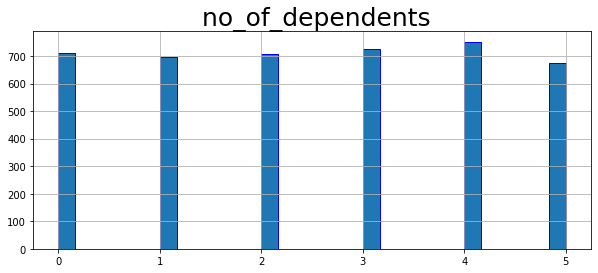

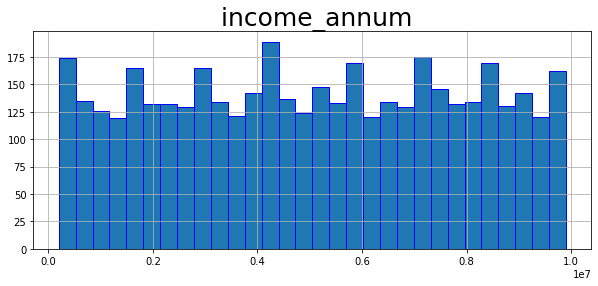

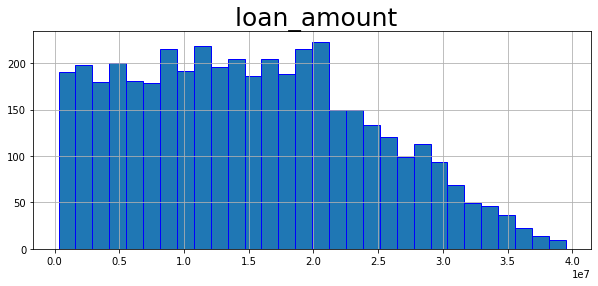

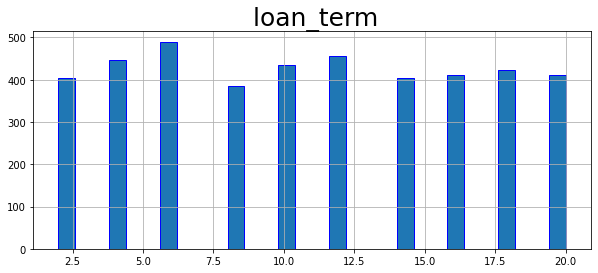

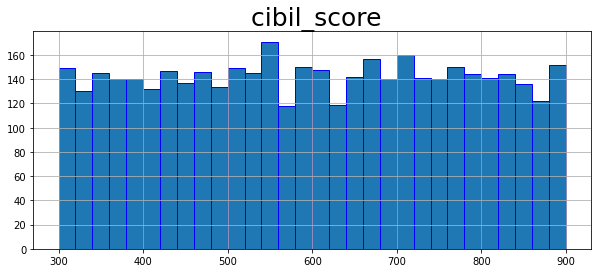

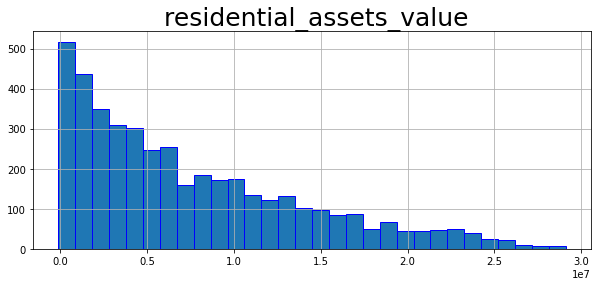

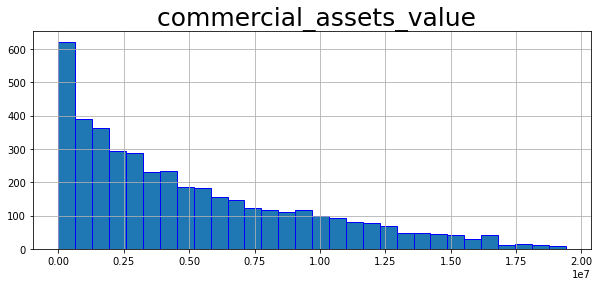

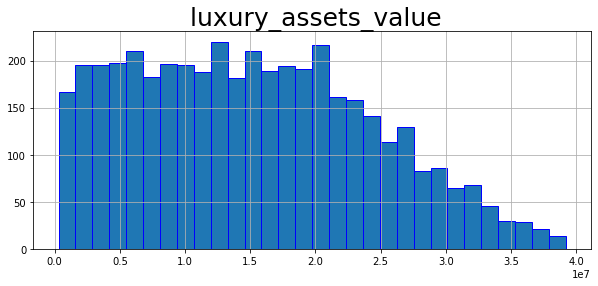

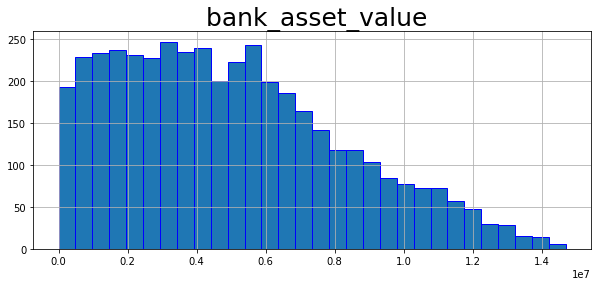

In [13]:
for x in num_features:
  desc_num_feature(x)

### Categorical Univariate EDA

               count  percent
 education                   
 Graduate       2144     50.2
 Not Graduate   2125     49.8


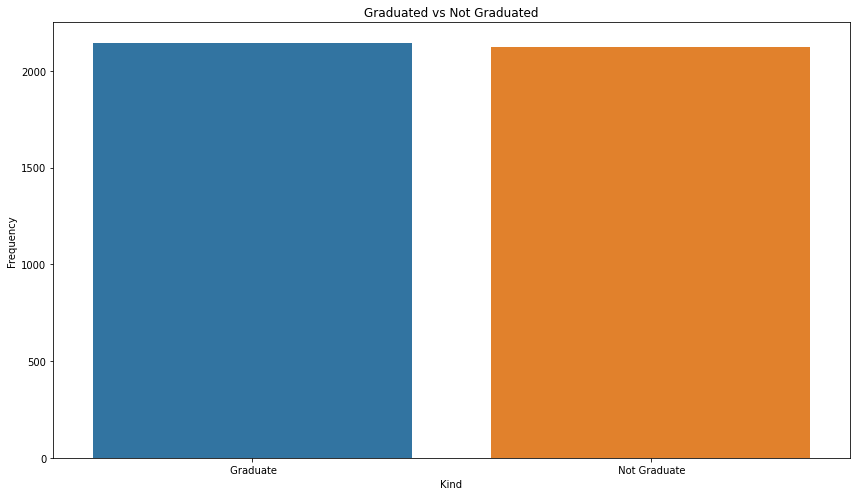

In [14]:
plt.figure(figsize=(12, 7))
sns.countplot(x=loan[" education"])
plt.title('Graduated vs Not Graduated')
plt.xlabel('Kind')
plt.ylabel('Frequency')
# Show the visualization
feature = cat_features[0]
count = loan[feature].value_counts()
percent = 100*loan[feature].value_counts(normalize=True)
df = pd.DataFrame({'count':count, 'percent':percent.round(1)})
print(df)
plt.tight_layout()
plt.show();

                count  percent
 self_employed                
 Yes             2150     50.4
 No              2119     49.6


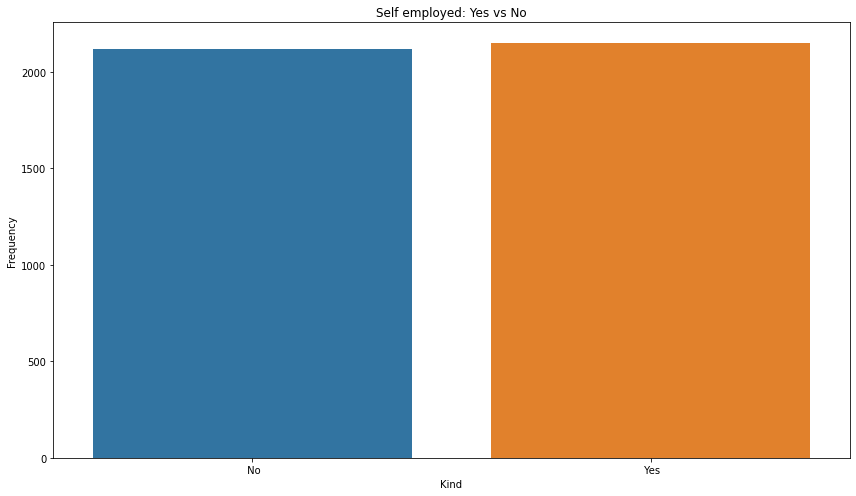

In [15]:
plt.figure(figsize=(12, 7))
sns.countplot(x=loan[" self_employed"])
plt.title('Self employed: Yes vs No')
plt.xlabel('Kind')
plt.ylabel('Frequency')
# Show the visualization
feature = cat_features[1]
count = loan[feature].value_counts()
percent = 100*loan[feature].value_counts(normalize=True)
df = pd.DataFrame({'count':count, 'percent':percent.round(1)})
print(df)
plt.tight_layout()
plt.show();

              count  percent
 loan_status                
 Approved      2656     62.2
 Rejected      1613     37.8


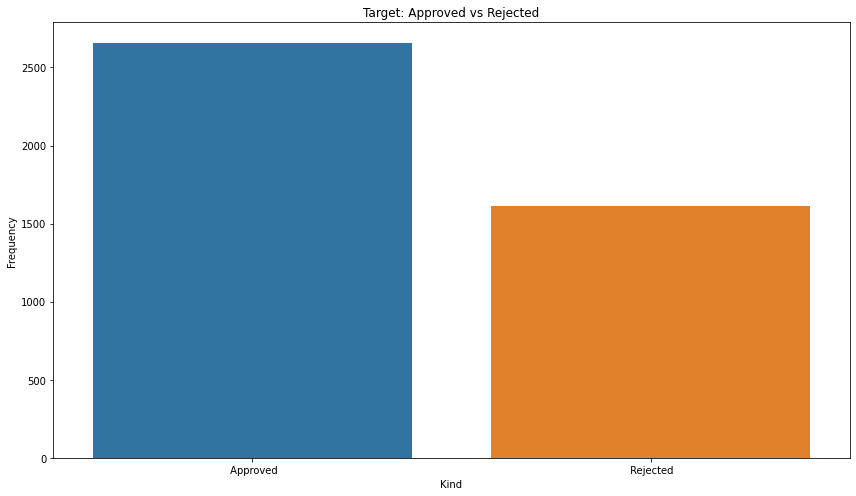

In [16]:
plt.figure(figsize=(12, 7))
sns.countplot(x=loan[" loan_status"])
plt.title('Target: Approved vs Rejected')
plt.xlabel('Kind')
plt.ylabel('Frequency')
# Show the visualization
feature = cat_features[2]
count = loan[feature].value_counts()
percent = 100*loan[feature].value_counts(normalize=True)
df = pd.DataFrame({'count':count, 'percent':percent.round(1)})
print(df)
plt.tight_layout()
plt.show();

### Bivariate EDA

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\axisgrid.py:64: UserWarning: The figure layout has changed to tight
  self.fig.tight_layout(*args, **kwargs)


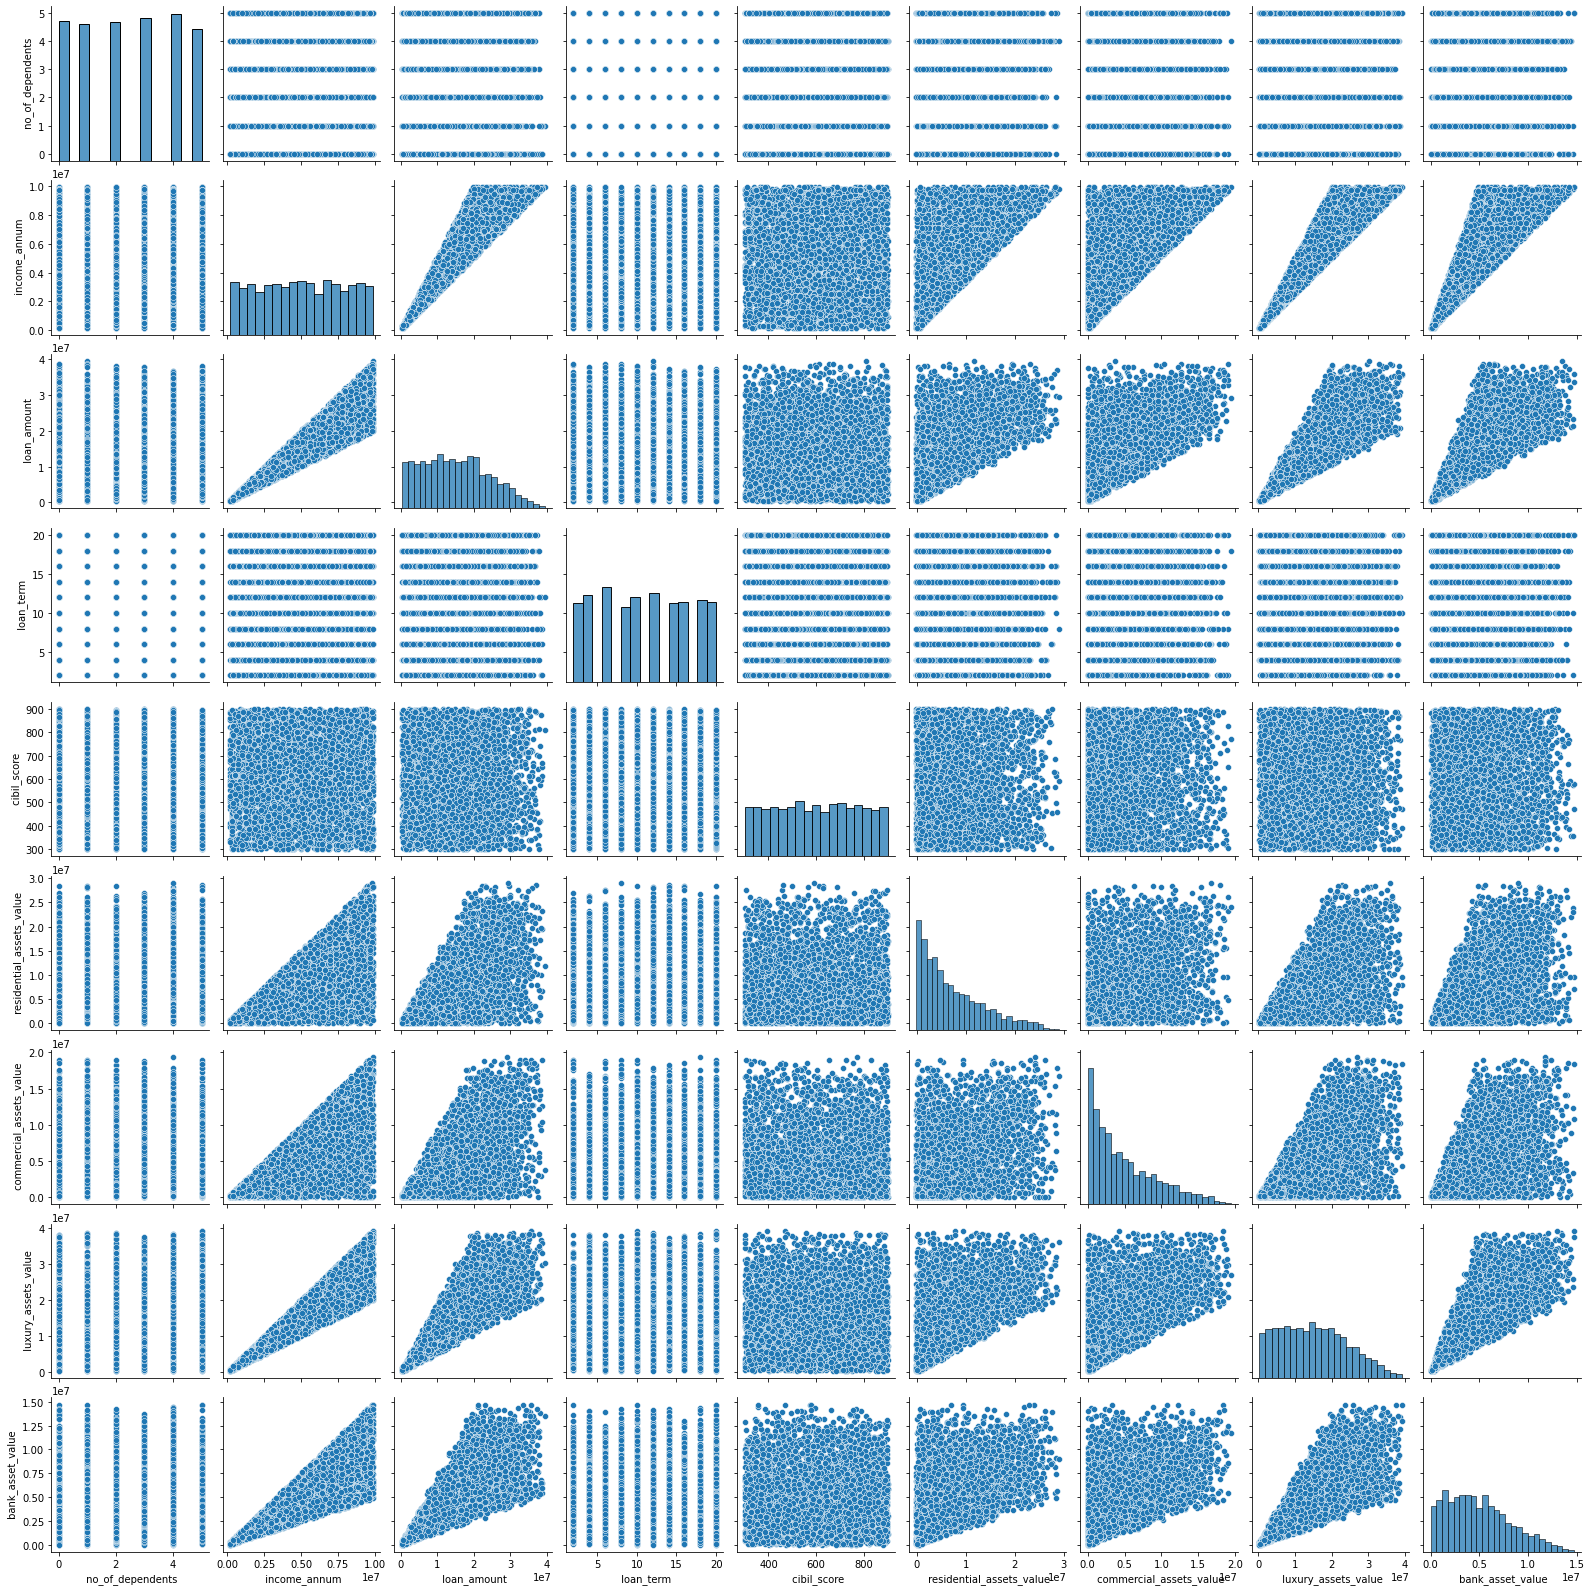

In [17]:
sns.pairplot(loan)
plt.show();

## Feature Engineering

In [18]:
def categorize_education(education):
    if education == ' Graduate':
        category = 1
    else:
        category = 0
    return category

In [19]:
loan[' education'] = loan[' education'].apply(categorize_education)

In [20]:
loan[' education'].value_counts()

 education
1    2144
0    2125
Name: count, dtype: int64

In [21]:
def categorize_self_employed(employed):
    if employed == ' Yes':
        category = 1
    else:
        category = 0
    return category

In [22]:
loan[' self_employed'] = loan[' self_employed'].apply(categorize_self_employed)

In [23]:
loan[' self_employed'].value_counts()

 self_employed
1    2150
0    2119
Name: count, dtype: int64

In [24]:
def categorize_target(target):
    if target == ' Approved':
        category = 1
    else:
        category = 0
    return category

In [25]:
loan[' loan_status'] = loan[' loan_status'].apply(categorize_target) 

In [26]:
loan[' loan_status'].value_counts()

 loan_status
1    2656
0    1613
Name: count, dtype: int64

In [27]:
from numpy import nan
loan[[" residential_assets_value"," commercial_assets_value",
      " bank_asset_value"]] = loan[[" residential_assets_value"," commercial_assets_value",
      " bank_asset_value"]].replace(0,nan)
print(loan.isnull().sum())

 no_of_dependents              0
 education                     0
 self_employed                 0
 income_annum                  0
 loan_amount                   0
 loan_term                     0
 cibil_score                   0
 residential_assets_value     45
 commercial_assets_value     107
 luxury_assets_value           0
 bank_asset_value              8
 loan_status                   0
dtype: int64


In [28]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)

In [29]:
loan[" residential_assets_value"]=imputer.fit_transform(loan[[" residential_assets_value"]]).round(2)
loan[" commercial_assets_value"]=imputer.fit_transform(loan[[" commercial_assets_value"]]).round(2)
loan[" bank_asset_value"]=imputer.fit_transform(loan[[" bank_asset_value"]]).round(2)

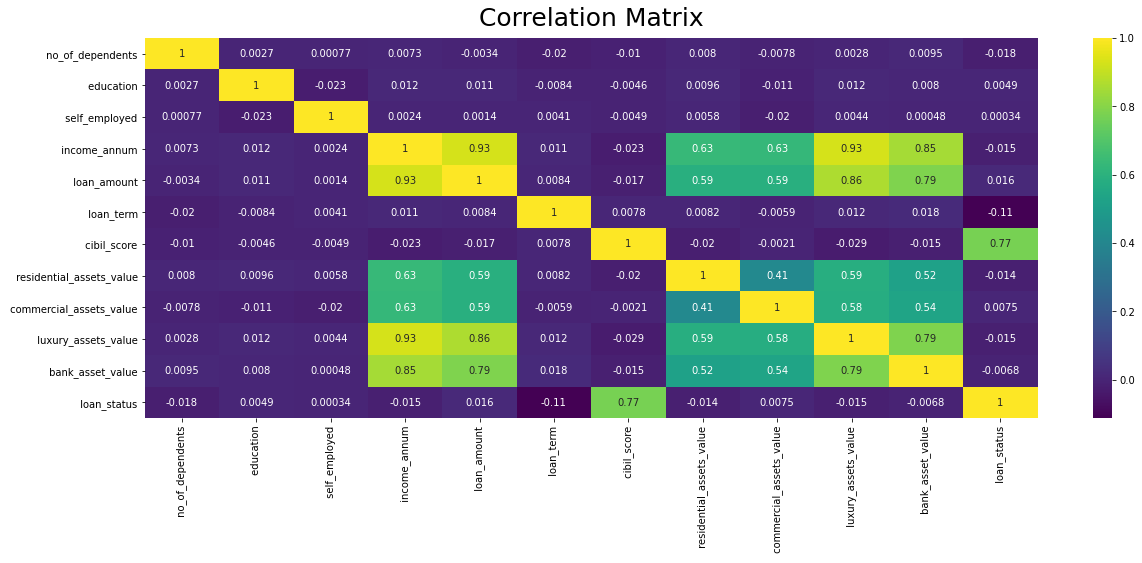

In [30]:
# Matriz de correlación
plt.figure(figsize=(20, 7))
heatmap = sns.heatmap(loan.corr(),cmap='viridis',annot=True)
heatmap.set_title('Correlation Matrix', fontdict={'fontsize':25}, pad=12);

## Finding outliers, Removing inconsistence records and delimit outliers

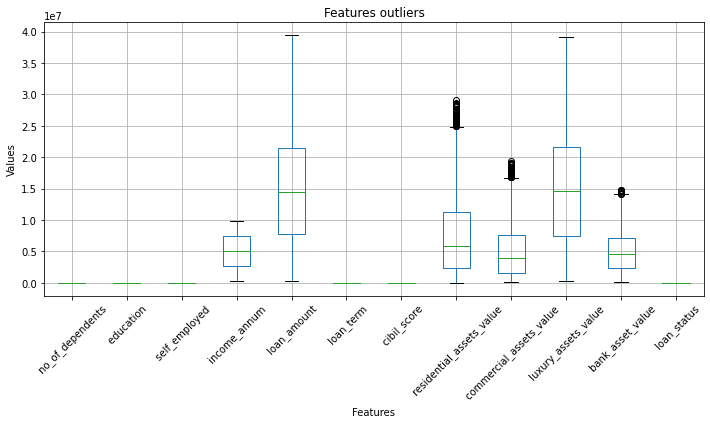

In [31]:
# A visualization to see the outliers in data
plt.figure(figsize=(10, 6))
loan.boxplot(rot=45)
plt.title('Features outliers')
plt.xlabel('Features')
plt.ylabel('Values')
plt.tight_layout()
plt.show();

In [32]:
def detect_outliers(column):
    Q1 = np.percentile(column, 25)
    Q3 = np.percentile(column, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (column < lower_bound) | (column > upper_bound)

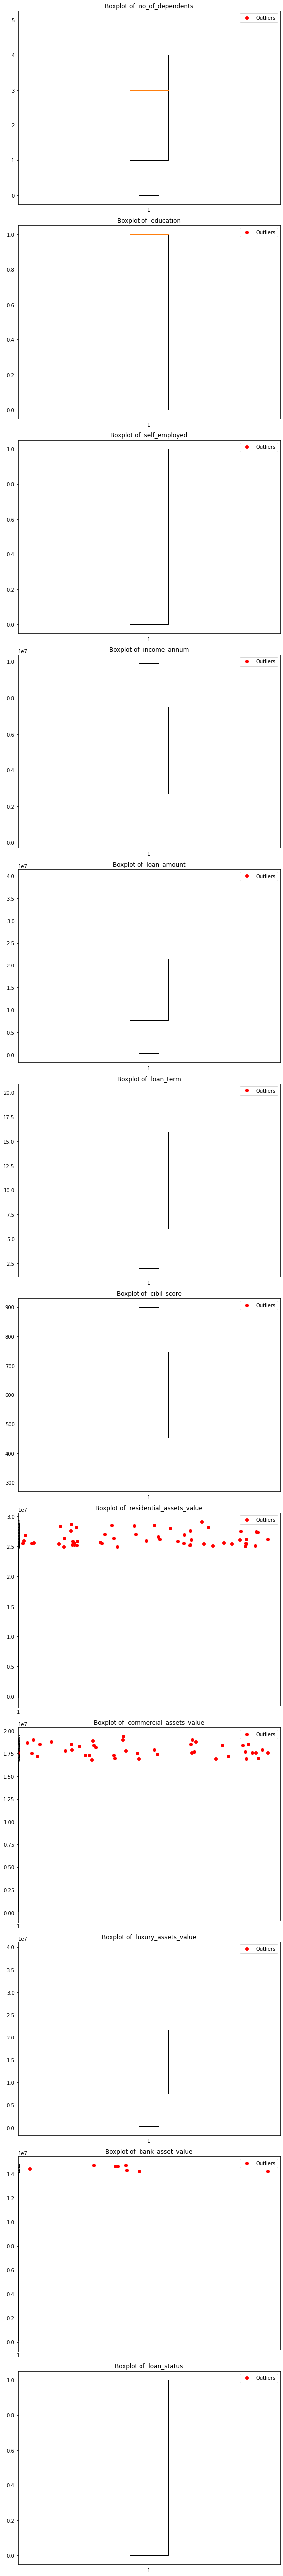

In [33]:
fig, axs = plt.subplots(nrows=len(loan.columns), figsize=(8, 6 * len(loan.columns)))
# Iterate through the columns and create a chart for each one
for i, columna in enumerate(loan.columns):
    axs[i].boxplot(loan[columna])
    axs[i].set_title(f'Boxplot of {columna}')
    # Detect and highlight outliers
    outliers = detect_outliers(loan[columna])
    axs[i].plot(np.where(outliers)[0] + 1, loan[columna][outliers], 'ro', label='Outliers')
    axs[i].legend()

plt.tight_layout()
plt.show();

In [34]:
def delimit_variables(df):
    percentiles = df.select_dtypes(include=np.float64).quantile([0.01, 0.95])
    
    def delimit(col):
        if col.dtype == np.float64:
            return col.clip(lower=percentiles.loc[0.01, col.name], upper=percentiles.loc[0.95, col.name])
        else:
            return col
    
    return df.apply(delimit)

In [35]:
loan = delimit_variables(loan)

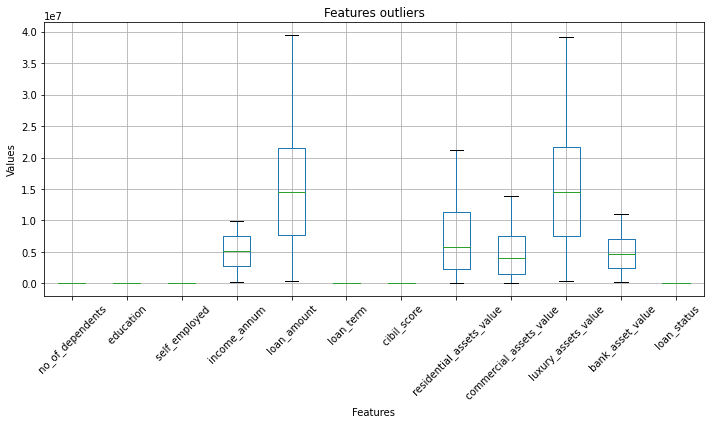

In [36]:
# A visualization to see the outliers in data
plt.figure(figsize=(10, 6))
loan.boxplot(rot=45)
plt.title('Features outliers')
plt.xlabel('Features')
plt.ylabel('Values')
plt.tight_layout()
plt.show();

## Split train and test features

In [37]:
X = loan.drop([" loan_status"], axis=1)    # independent variables
y = loan[" loan_status"]   #Objective or dependent target

In [38]:
X.shape

(4269, 11)

In [39]:
y.head()

0    1
1    0
2    0
3    0
4    0
Name:  loan_status, dtype: int64

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123)

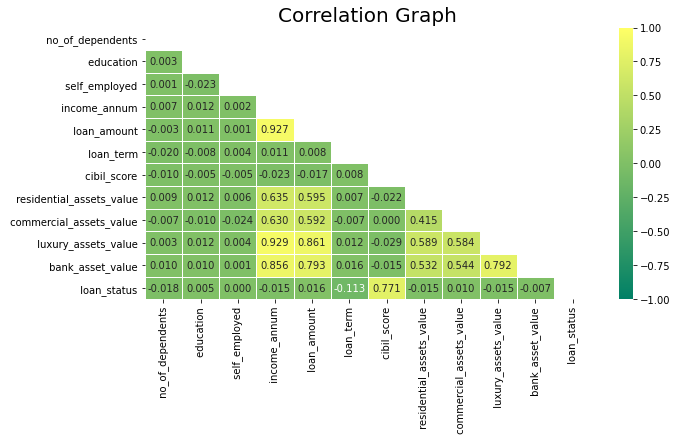

In [41]:
mask = np.triu(np.ones_like(loan.corr(), dtype=bool))
plt.figure(figsize=(10, 5))
plt.title("Correlation Graph", size=20)
sns.heatmap(loan.corr(), annot=True, fmt=".3f",
            vmin=-1, vmax=1, linewidth=1,
            center=0, mask=mask, cmap="summer")
plt.show();

In [42]:
print("Original Data",X.shape)
print("Data for Train",X_train.shape)
print("Data for Test",X_test.shape)
print(y_train.shape)
print(y_test.shape)

Original Data (4269, 11)
Data for Train (3415, 11)
Data for Test (854, 11)
(3415,)
(854,)


## Modeling

## 1. Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report 
# Llamamos al objeto
lg= LogisticRegression(C=100)
# Entrenamos al modelos
lg.fit(X_train,y_train)                         
# Haciendo predicciones en el conjunto train
y_train_lg=lg.predict(X_train)
# Haciendo predicciones en el conjunto te¿st
y_pred_lg=lg.predict(X_test)

In [44]:
# for train
acc_lg_train = accuracy_score(y_train, y_train_lg)
print("Classificación de Reporte (train):\n",classification_report(y_train, y_train_lg))
print("---------------------------------------------------\n")
# for test
acc_lg_test = accuracy_score(y_test, y_pred_lg)
print("Classificación de Reporte (test):\n",classification_report(y_test, y_pred_lg))

Classificación de Reporte (train):
               precision    recall  f1-score   support

           0       1.00      0.00      0.00      1263
           1       0.63      1.00      0.77      2152

    accuracy                           0.63      3415
   macro avg       0.82      0.50      0.39      3415
weighted avg       0.77      0.63      0.49      3415

---------------------------------------------------

Classificación de Reporte (test):
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       350
           1       0.59      1.00      0.74       504

    accuracy                           0.59       854
   macro avg       0.29      0.50      0.37       854
weighted avg       0.35      0.59      0.44       854



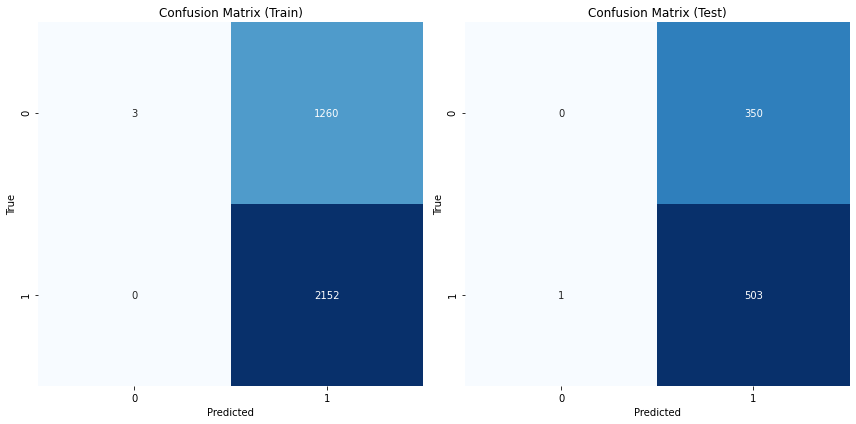

In [45]:
conf_matrix_lg_train = confusion_matrix(y_train, y_train_lg)
conf_matrix_lg_test = confusion_matrix(y_test, y_pred_lg)
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
# Visualize confusion matrix for train set
sns.heatmap(conf_matrix_lg_train , annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[0])
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')
axes[0].set_title('Confusion Matrix (Train)')
# Visualize confusion matrix for test set
sns.heatmap(conf_matrix_lg_test, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[1])
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('True')
axes[1].set_title('Confusion Matrix (Test)')
plt.tight_layout();
plt.show();

## 2. Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=20,
                            max_depth=7,
                            min_samples_split=2)
# Entrena el clasificador en los datos de entrenamiento
rf.fit(X_train, y_train)
# Realiza predicciones en los datos de train
y_train_rf = rf.predict(X_train)
# Realiza predicciones en los datos de prue
y_pred_rf = rf.predict(X_test)

In [47]:
# for train
acc_rf_train = accuracy_score(y_train, y_train_rf)
print("Classificación de Reporte (train):\n",classification_report(y_train ,y_train_rf))
print("---------------------------------------------------\n")
# for test
acc_rf_test = accuracy_score(y_test, y_pred_lg)
print("Classificación de Reporte (test):\n",classification_report(y_test, y_pred_rf))

Classificación de Reporte (train):
               precision    recall  f1-score   support

           0       1.00      0.98      0.99      1263
           1       0.99      1.00      0.99      2152

    accuracy                           0.99      3415
   macro avg       0.99      0.99      0.99      3415
weighted avg       0.99      0.99      0.99      3415

---------------------------------------------------

Classificación de Reporte (test):
               precision    recall  f1-score   support

           0       0.98      0.93      0.95       350
           1       0.95      0.99      0.97       504

    accuracy                           0.96       854
   macro avg       0.97      0.96      0.96       854
weighted avg       0.96      0.96      0.96       854



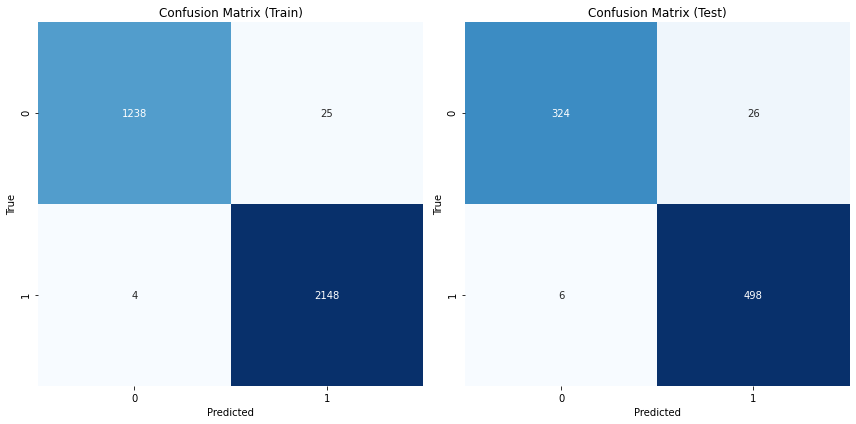

In [48]:
conf_matrix_rf_train = confusion_matrix(y_train, y_train_rf)
conf_matrix_rf_test = confusion_matrix(y_test, y_pred_rf)
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
# Visualize confusion matrix for train set
sns.heatmap(conf_matrix_rf_train, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[0])
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')
axes[0].set_title('Confusion Matrix (Train)')
# Visualize confusion matrix for test set
sns.heatmap(conf_matrix_rf_test, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[1])
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('True')
axes[1].set_title('Confusion Matrix (Test)')
plt.tight_layout();
plt.show();

## 3. XGBoost

In [49]:
from xgboost import XGBClassifier
import xgboost as xgb
# Inicializa el clasificador Random Forest
xgb = xgb.XGBClassifier(n_estimators=50, 
                        max_depth=7)
# Entrena el clasificador en los datos de entrenamiento
xgb.fit(X_train, y_train)
# Realiza predicciones en los datos de prueba
y_train_xgb = xgb.predict(X_train)
# Realiza predicciones en los datos de prueba
y_pred_xgb = xgb.predict(X_test)

In [50]:
# for train
acc_xgb_train = accuracy_score(y_train, y_train_xgb)
print("Classificación de Reporte (train):\n",classification_report(y_train ,y_train_xgb))
print("---------------------------------------------------\n")
# for test
acc_xgb_test = accuracy_score(y_test, y_pred_xgb)
print("Classificación de Reporte (test):\n",classification_report(y_test, y_pred_xgb))

Classificación de Reporte (train):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1263
           1       1.00      1.00      1.00      2152

    accuracy                           1.00      3415
   macro avg       1.00      1.00      1.00      3415
weighted avg       1.00      1.00      1.00      3415

---------------------------------------------------

Classificación de Reporte (test):
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       350
           1       0.98      0.99      0.99       504

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



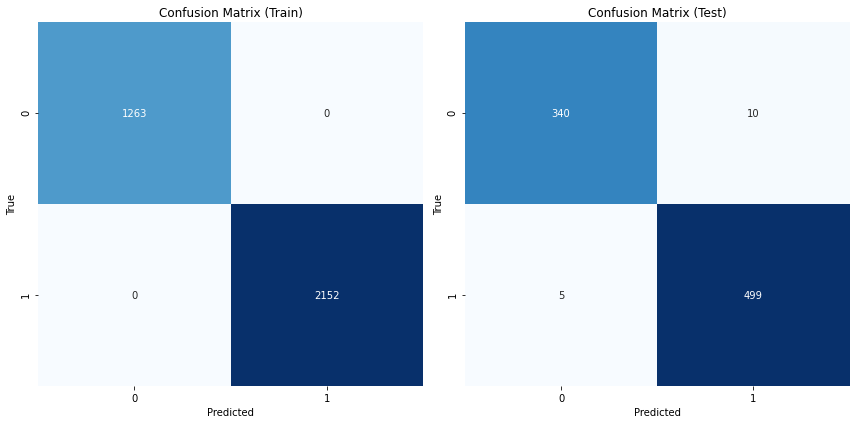

In [51]:
conf_matrix_xgb_train = confusion_matrix(y_train, y_train_xgb)
conf_matrix_xgb_test = confusion_matrix(y_test, y_pred_xgb)
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
# Visualize confusion matrix for train set
sns.heatmap(conf_matrix_xgb_train, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[0])
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')
axes[0].set_title('Confusion Matrix (Train)')
# Visualize confusion matrix for test set
sns.heatmap(conf_matrix_xgb_test, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[1])
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('True')
axes[1].set_title('Confusion Matrix (Test)')
plt.tight_layout();
plt.show();

## 4. LightGBM

In [52]:
from lightgbm import LGBMClassifier
import lightgbm as lgb
lgbm = lgb.LGBMClassifier(n_estimators=50, 
                        max_depth=7)
lgbm.fit(X_train, y_train)
# predict the results train
y_train_lgbm = lgbm.predict(X_train)
# predict the results test
y_pred_lgbm = lgbm.predict(X_test)

In [53]:
# for train
acc_xgb_train = accuracy_score(y_train, y_train_lgbm)
print("Classificación de Reporte (train):\n",classification_report(y_train ,y_train_lgbm))
print("---------------------------------------------------\n")
# for test
acc_xgb_test = accuracy_score(y_test, y_pred_lgbm)
print("Classificación de Reporte (test):\n",classification_report(y_test, y_pred_lgbm))

Classificación de Reporte (train):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1263
           1       1.00      1.00      1.00      2152

    accuracy                           1.00      3415
   macro avg       1.00      1.00      1.00      3415
weighted avg       1.00      1.00      1.00      3415

---------------------------------------------------

Classificación de Reporte (test):
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       350
           1       0.98      0.99      0.99       504

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



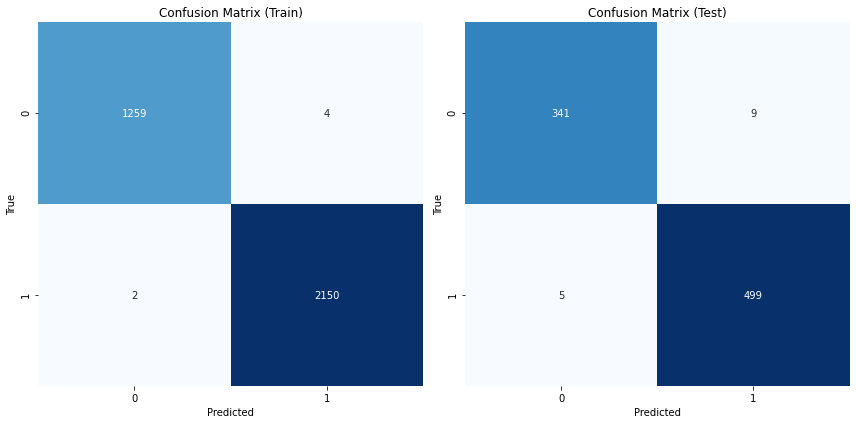

In [54]:
conf_matrix_lgbm_train = confusion_matrix(y_train, y_train_lgbm)
conf_matrix_lgbm_test = confusion_matrix(y_test, y_pred_lgbm)
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
# Visualize confusion matrix for train set
sns.heatmap(conf_matrix_lgbm_train, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[0])
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')
axes[0].set_title('Confusion Matrix (Train)')
# Visualize confusion matrix for test set
sns.heatmap(conf_matrix_lgbm_test, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[1])
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('True')
axes[1].set_title('Confusion Matrix (Test)')
plt.tight_layout();
plt.show();

## 5. GradientBoosting

In [55]:
from sklearn.ensemble import GradientBoostingClassifier
# Inicializa el clasificador GradientBoosting
gb = GradientBoostingClassifier(n_estimators=60, learning_rate=0.2, max_depth=7)
# Entrena el clasificador en los datos de entrenamiento
gb.fit(X_train, y_train)
# Realiza predicciones en los datos de train
y_train_gb = gb.predict(X_train)
# Realiza predicciones en los datos de test
y_pred_gb = gb.predict(X_test)

In [56]:
# for train
acc_gb_train = accuracy_score(y_train, y_train_gb)
print("Classificación de Reporte (train):\n",classification_report(y_train ,y_train_gb))
print("---------------------------------------------------\n")
# for test
acc_gb_test = accuracy_score(y_test, y_pred_gb)
print("Classificación de Reporte (test):\n",classification_report(y_test, y_pred_gb))

Classificación de Reporte (train):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1263
           1       1.00      1.00      1.00      2152

    accuracy                           1.00      3415
   macro avg       1.00      1.00      1.00      3415
weighted avg       1.00      1.00      1.00      3415

---------------------------------------------------

Classificación de Reporte (test):
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       350
           1       0.98      0.99      0.98       504

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



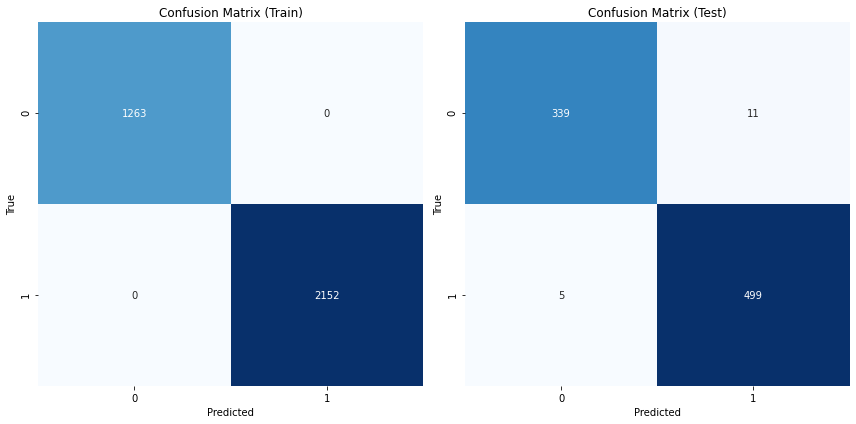

In [57]:
conf_matrix_gb_train = confusion_matrix(y_train, y_train_gb)
conf_matrix_gb_test = confusion_matrix(y_test, y_pred_gb)
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
# Visualize confusion matrix for train set
sns.heatmap(conf_matrix_gb_train, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[0])
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')
axes[0].set_title('Confusion Matrix (Train)')
# Visualize confusion matrix for test set
sns.heatmap(conf_matrix_gb_test, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[1])
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('True')
axes[1].set_title('Confusion Matrix (Test)')
plt.tight_layout();
plt.show();

## 6. HistGradientBoosting

In [58]:
from sklearn.ensemble import HistGradientBoostingClassifier
# Inicializa el clasificador HistGradientBoosting
hgb = HistGradientBoostingClassifier(max_iter=90, 
                                     learning_rate=0.2, 
                                     max_depth=5)
# Entrena el clasificador en los datos de entrenamiento
hgb.fit(X_train, y_train)
# Realiza predicciones en los datos de train
y_train_hgb = hgb.predict(X_train)
# Realiza predicciones en los datos de test
y_pred_hgb = hgb.predict(X_test)

In [59]:
# for train
acc_hgb_train = accuracy_score(y_train, y_train_hgb)
print("Classificación de Reporte (train):\n",classification_report(y_train ,y_train_hgb))
print("---------------------------------------------------\n")
# for test
acc_hgb_test = accuracy_score(y_test, y_pred_hgb)
print("Classificación de Reporte (test):\n",classification_report(y_test, y_pred_hgb))

Classificación de Reporte (train):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1263
           1       1.00      1.00      1.00      2152

    accuracy                           1.00      3415
   macro avg       1.00      1.00      1.00      3415
weighted avg       1.00      1.00      1.00      3415

---------------------------------------------------

Classificación de Reporte (test):
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       350
           1       0.98      0.99      0.99       504

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



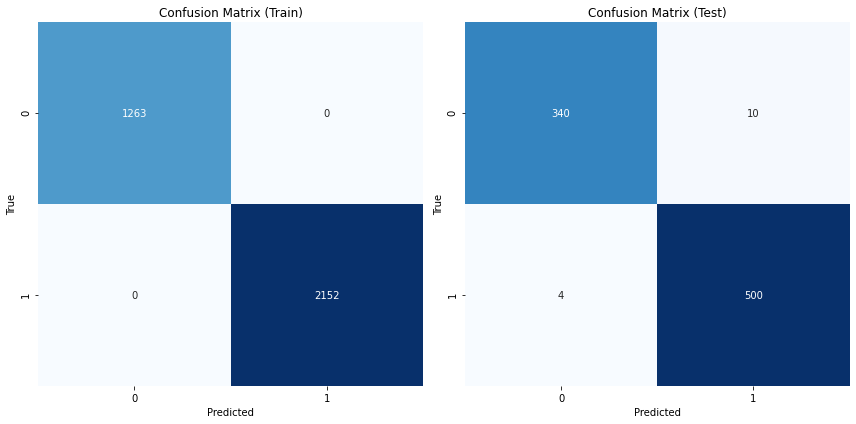

In [60]:
conf_matrix_hgb_train = confusion_matrix(y_train, y_train_hgb)
conf_matrix_hgb_test = confusion_matrix(y_test, y_pred_hgb)
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
# Visualize confusion matrix for train set
sns.heatmap(conf_matrix_hgb_train, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[0])
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')
axes[0].set_title('Confusion Matrix (Train)')
# Visualize confusion matrix for test set
sns.heatmap(conf_matrix_hgb_test, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[1])
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('True')
axes[1].set_title('Confusion Matrix (Test)')
plt.tight_layout();
plt.show();

## ROC Curve

In [61]:
# Entrenar modelos
models = {
    "Logistic Regression": lg,
    "Random Forest": rf,
    "XGBoost": xgb,
    "LightGBM": lgbm,
    "Gradient Boosting": gb,
    "Hist Gradient Boosting": hgb
}

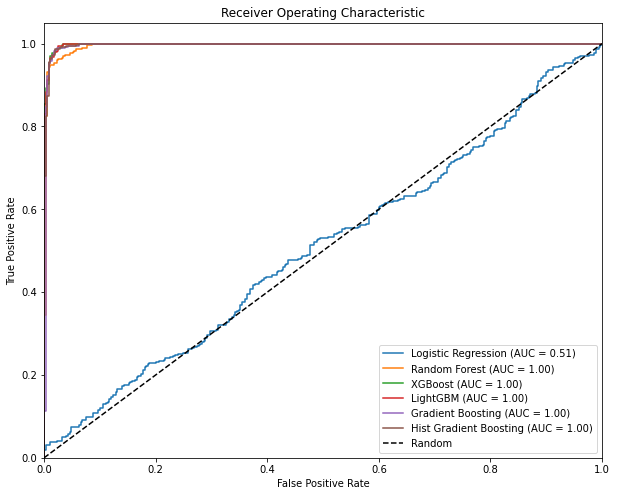

In [62]:
from sklearn.metrics import roc_curve, roc_auc_score
# Entrenar y evaluar modelos
plt.figure(figsize=(10, 8))
for name, model in models.items():
    model.fit(X_train, y_train)
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show();

## Features Importances

In [63]:
feature_names = X.columns
feature_importances_lgbm = lgbm.feature_importances_

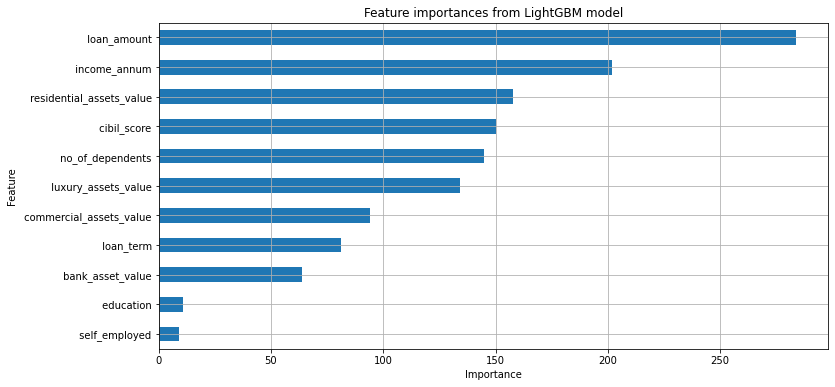

In [64]:
fig, ax = plt.subplots(figsize=(12,6))
feature_importances = pd.Series(data=feature_importances_lgbm, index=feature_names)
feature_importances.sort_values().plot(kind='barh', ax=ax)
ax.set_xlabel('Importance')
ax.set_ylabel('Feature')
ax.set_title('Feature importances from LightGBM model')
ax.grid();

# Predicting the loan approval or rejected

In [65]:
test = loan.sample(5)
test

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
2698,4,0,0,4200000,11100000,8,526,11600000.0,200000.0,16800000,4900000.0,0
3392,2,0,0,400000,1500000,4,743,700000.0,500000.0,1200000,300000.0,1
2008,5,1,1,6800000,22600000,2,804,3500000.0,12500000.0,18200000,9900000.0,1
1260,3,1,0,1700000,5300000,14,696,300000.0,700000.0,4500000,800000.0,1
2402,1,0,0,7300000,23700000,16,852,9400000.0,6800000.0,22600000,8500000.0,1


In [66]:
test = test.drop([' loan_status'], axis=1)
test

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
2698,4,0,0,4200000,11100000,8,526,11600000.0,200000.0,16800000,4900000.0
3392,2,0,0,400000,1500000,4,743,700000.0,500000.0,1200000,300000.0
2008,5,1,1,6800000,22600000,2,804,3500000.0,12500000.0,18200000,9900000.0
1260,3,1,0,1700000,5300000,14,696,300000.0,700000.0,4500000,800000.0
2402,1,0,0,7300000,23700000,16,852,9400000.0,6800000.0,22600000,8500000.0


In [67]:
lgbm.predict(test)

array([0, 1, 1, 1, 1], dtype=int64)